<a href="https://colab.research.google.com/github/ceyhun2306/Data-Analysis/blob/main/data_analysing/shopping_behaviours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download zubairamuti/shopping-behaviours-dataset

Dataset URL: https://www.kaggle.com/datasets/zubairamuti/shopping-behaviours-dataset
License(s): CC0-1.0
  0% 0.00/70.5k [00:00<?, ?B/s]
100% 70.5k/70.5k [00:00<00:00, 238MB/s]


In [4]:
!uznip/content/shopping-behaviours-dataset.zip

/bin/bash: line 1: uznip/content/shopping-behaviours-dataset.zip: No such file or directory


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/shopping-behaviours-dataset.zip")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df.shape

(3900, 18)

In [11]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [13]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


#Let's explore age distributaion

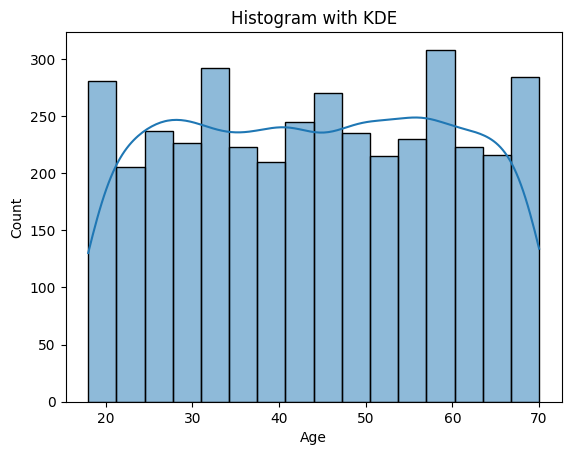

In [14]:
sns.histplot(df['Age'], kde=True)
plt.title("Histogram with KDE")
plt.show()

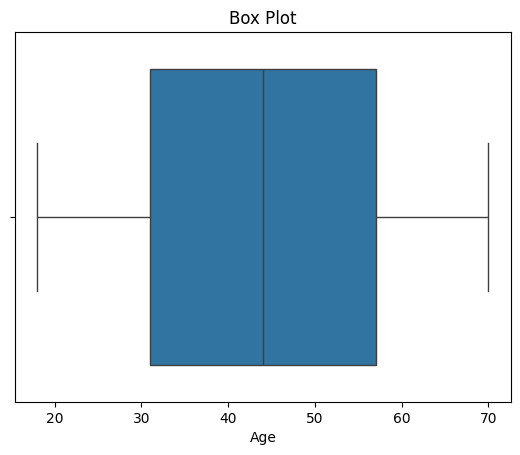

In [15]:
sns.boxplot(x=df['Age'])
plt.title("Box Plot")
plt.show()

###The age distribution looks pretty good. It's balanced, not skewed to one side. That means age won't be a problem for us to work with.

#Which gender shopped more?

In [16]:
gender_counts = df["Gender"].value_counts()
gender_counts

,count
Gender,
Male,2652
Female,1248


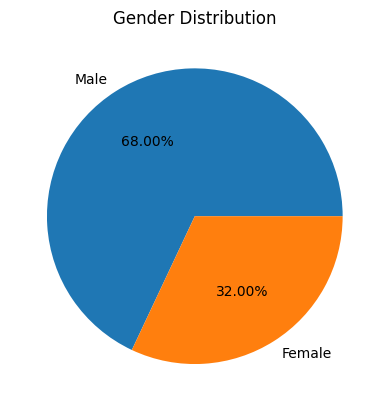

In [17]:
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.2f%%")
plt.title("Gender Distribution");

###The pie chart shows that male customers made up 68% of the purchases, while female customers were only 32%. This is a significant imbalance. We need to be careful with this, as it could affect how we interpret other findings.

###So the pie chart only shows us gender distribution. We need to add another layer to see which gender shopped more.

In [18]:
male_shopping_counts = df[df.Gender == "Male"]["Previous Purchases"].sum()
female_shopping_counts = df[df.Gender == "Female"]["Previous Purchases"].sum()

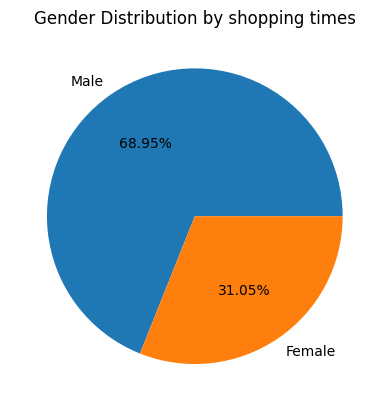

In [19]:
plt.pie([male_shopping_counts, female_shopping_counts], labels=["Male", "Female"], autopct="%1.2f%%")
plt.title("Gender Distribution by shopping times");

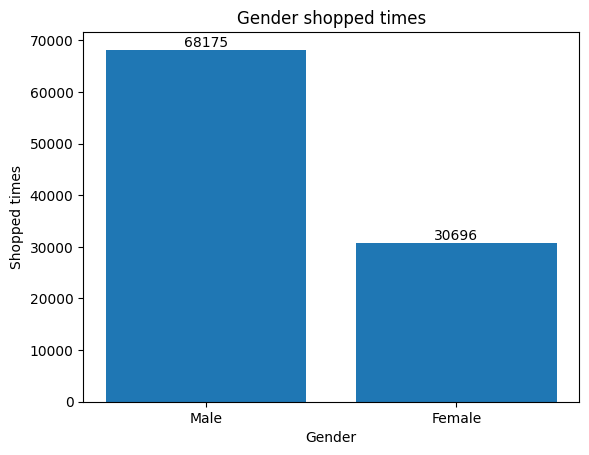

In [20]:
bars = plt.bar(["Male", "Female"], [male_shopping_counts, female_shopping_counts])
plt.title("Gender shopped times")
plt.xlabel("Gender")
plt.ylabel("Shopped times")
plt.bar_label(bars)
plt.show()

###The imbalanced gender distribution is clearly influencing the shopping counts. Since males made up the majority of our customers, they also contributed more to the total number of shopping trips. We can see this domino effect—more customers means more purchases, which is why the average shopping count for males is likely higher.

#Which categories are choose by gender more?

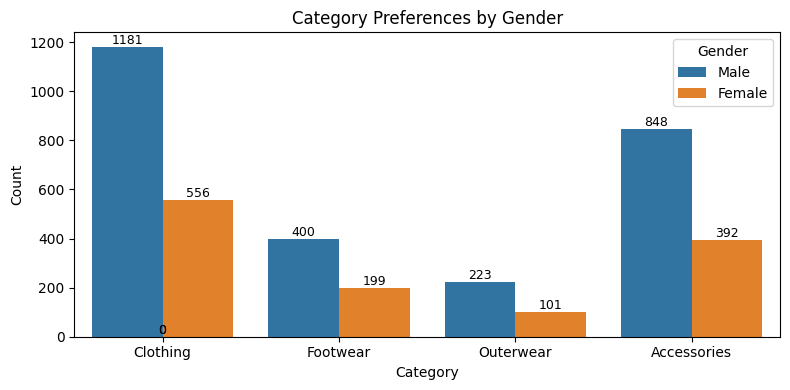

In [21]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="Category", hue="Gender")
plt.title("Category Preferences by Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Gender")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()

###As we can see, men dominate overall sales, so a direct gender comparison isn’t perfectly balanced. Among men, Clothing leads with 1,182 sales, followed by Accessories (848). After that, they show less interest in Footwear (400) and Outerwear (223). For women, the pattern is similar: Clothing comes first (556), then Accessories (392), with smaller numbers for Footwear (199) and Outerwear (101).

###The key takeaway is that Clothing and Accessories are top categories for both genders, but the much higher male purchase volume skews the overall sales picture.

#Which products sold the most?

In [22]:
itemsCount_category = (
    df.groupby("Category")["Item Purchased"]
      .value_counts()
      .reset_index(name="Count")
)

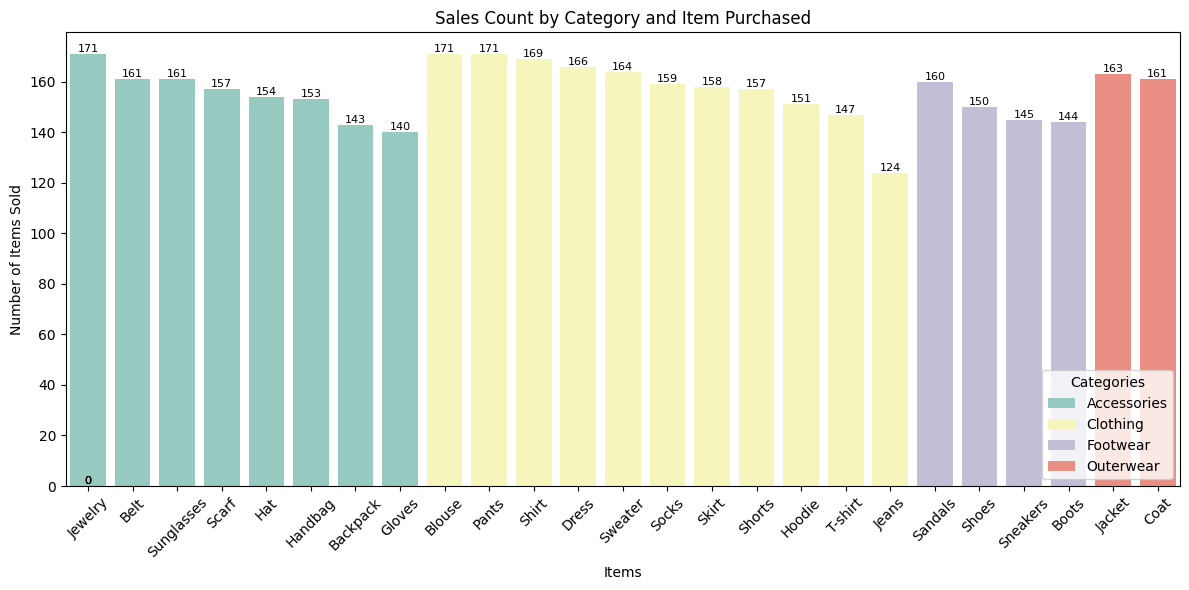

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=itemsCount_category,
    x="Item Purchased",
    y="Count",
    hue="Category",
    palette="Set3"
)

plt.title("Sales Count by Category and Item Purchased")
plt.xlabel("Items")
plt.ylabel("Number of Items Sold")
plt.xticks(rotation=45)
plt.legend(title="Categories")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha="center", va="bottom", fontsize=8
    )

plt.tight_layout()
plt.show()


###- **Clothing dominates overall variety and sales volume**, with several items clustered at the top:
  - Blouse & Pants lead (171 each), closely followed by Shirt (169) and Dress (166).
  - Even lower-ranked clothing pieces like Jeans (124) remain strong compared to other categories.

###- **Accessories also perform well:**
  - Jewelry (171) is the single best-selling item across all categories.
  - Belts and Sunglasses (161 each) follow closely, showing balanced interest in fashion add-ons.

###- **Outerwear maintains high counts despite being seasonal:**
  - Jackets (163) and Coats (161) both sell almost as much as top clothing items—indicating year-round demand.

###- **Footwear is steady but slightly lower:**
  - Sandals (160) lead, with Shoes (150) and Sneakers (145) close behind.


#Which age group shops the most?

In [24]:
bins = [18, 20, 30, 40, 50, 60, 120]
bin_names = ["18-20", "20-30", "30-40", "40-50", "50-60", "60+"]

In [25]:
df["age_group"] = pd.cut(df["Age"], bins=bins, labels=bin_names, right=False)

age_shopping = df["age_group"].value_counts().sort_index()

/tmp/ipython-input-1340228157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=age_shopping.index, y=age_shopping.values, palette="coolwarm", legend=False)


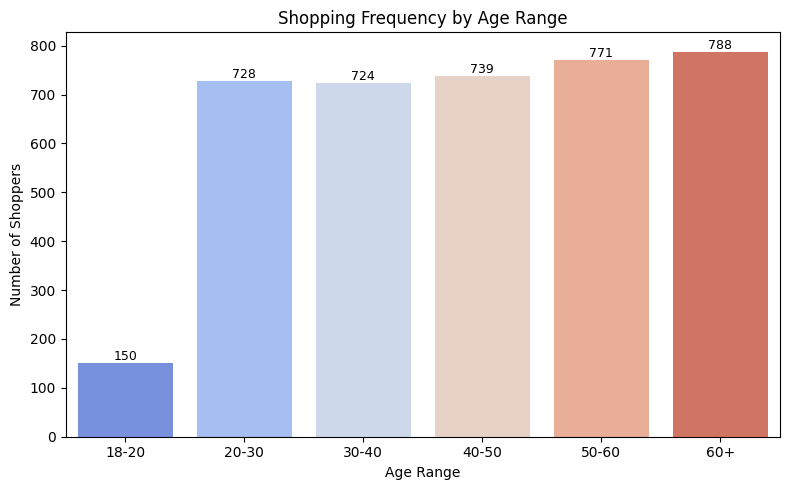

In [26]:
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=age_shopping.index, y=age_shopping.values, palette="coolwarm", legend=False)
plt.title("Shopping Frequency by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Shoppers")

for p in bars.patches:
    bars.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()

###As we can see, shoppers aged 60+ are the most active, which is interesting because we usually expect younger people to shop more frequently. This suggests that older adults may have more free time and financial stability, allowing them to shop more often—whether for leisure, gifting, or personal needs.

###Meanwhile, the 18–20 age group shows the lowest numbers, but this is partly explained by the fact that this group spans only 2 years, while the other age categories each cover a full 10-year range.

#Which top 10 places are the most profitable?

In [27]:
top10_location_profit = df.groupby("Location")["Purchase Amount (USD)"].sum().sort_values(ascending=False)[:10]

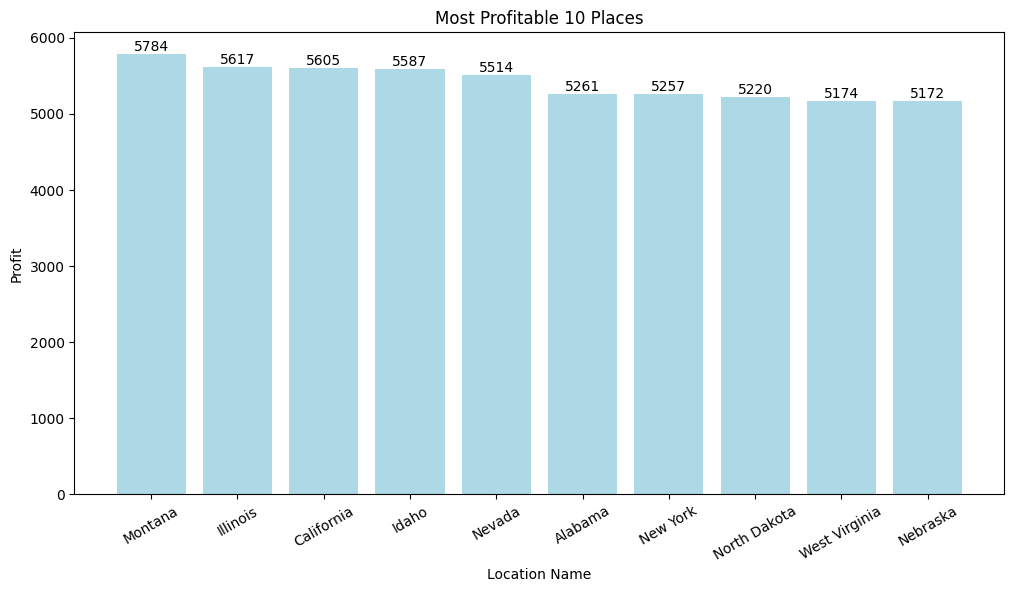

In [28]:
plt.figure(figsize=(12,6))
bars = plt.bar(top10_location_profit.index, top10_location_profit, color="Lightblue")
plt.xlabel("Location Name")
plt.xticks(rotation=30)
plt.ylabel("Profit")
plt.title("Most Profitable 10 Places")
plt.bar_label(bars)
plt.show()

###Looking at the top 10 locations for purchases, Montana tops the list at 5,784, followed closely by Illinois and California. Other states like Idaho, Nevada, Alabama, and New York also perform well, each bringing in over 5,000 in sales. Overall, sales are spread fairly evenly among these top regions, though Montana appears slightly stronger.

#Which season is the most profitable?

In [29]:
season_profit = df.groupby("Season")["Purchase Amount (USD)"].sum().sort_values(ascending=False)

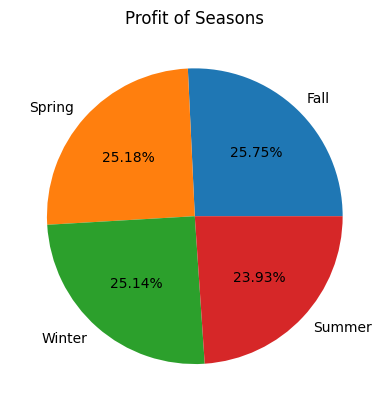

In [30]:
plt.pie(season_profit, labels=season_profit.index, autopct="%1.2f%%")
plt.title("Profit of Seasons")
plt.show()

#What top 3 items are purchased most often by season?

In [31]:
top3_items_per_season = (
    df.groupby("Season")["Item Purchased"]
      .value_counts()
      .groupby(level=0)
      .head(3)
      .reset_index(name="Count")
)

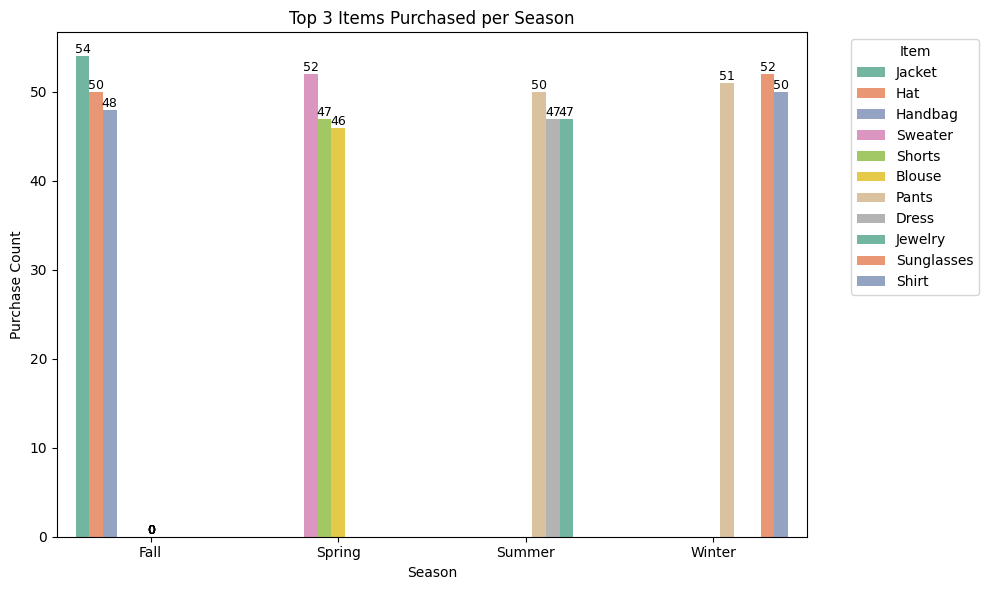

In [32]:
plt.figure(figsize=(10,6))
bars = sns.barplot(
    data=top3_items_per_season,
    x="Season",
    y="Count",
    hue="Item Purchased",
    palette="Set2"
)

plt.title("Top 3 Items Purchased per Season")
plt.xlabel("Season")
plt.ylabel("Purchase Count")
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc="upper left")

for p in bars.patches:
    bars.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()


###- **Fall:** Jackets, Hats, and Handbags are the top items. This makes sense because fall brings cooler weather, so people naturally buy warm outerwear like jackets. Hats are both functional and stylish for transitional weather, and handbags remain popular as people prepare for school, work, or daily routines.

###- **Spring:** Sweaters, Shorts, and Blouses lead sales. Spring is a transitional season—sweaters are still needed for cooler mornings, while shorts and blouses become popular as temperatures rise. This mix shows that shoppers are preparing for warmer days while still needing some layering.

###- **Summer:** Pants, Dresses, and Jewelry are in high demand. With the warmest season, people prefer light, breathable clothing like dresses and pants for comfort, while jewelry complements summer outfits and social activities like vacations and outdoor events.

###- **Winter:** Sunglasses, Pants, and Shirts surprisingly top sales. Sunglasses remain popular because winter sun can still be bright and reflective, especially on snow. Pants and shirts are essentials for layering and keeping warm, highlighting that practicality drives winter purchases alongside seasonal accessories.